<a href="https://colab.research.google.com/github/yevenbother/3MinuteThesis/blob/main/MY_FLOWERS_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load Alexnet

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}
model = alexnet(weights='DEFAULT').to(device)
model.eval();

# Load Images

In [ ]:
url = "https://docs.google.com/presentation/d/1wymT9aY9_qIaSer1Hmr0ibUXXtCRVzsjUWY8mhVulFE/edit#slide=id.g1d99e4633b5_0_6"

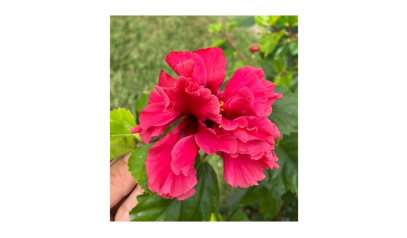

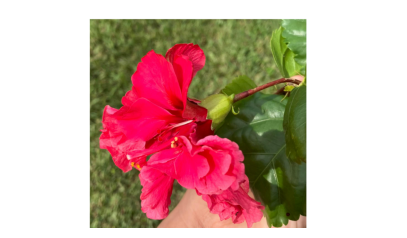

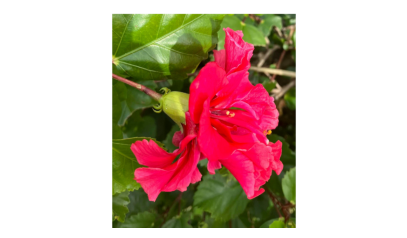

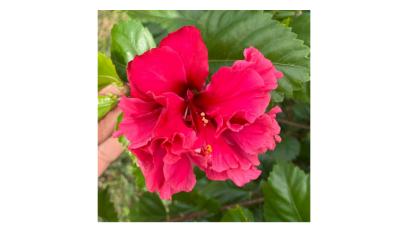

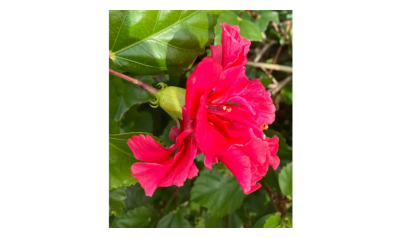

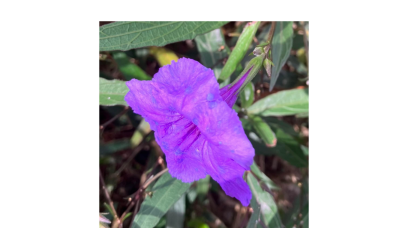

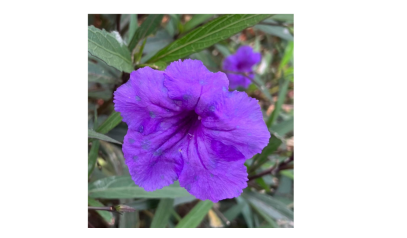

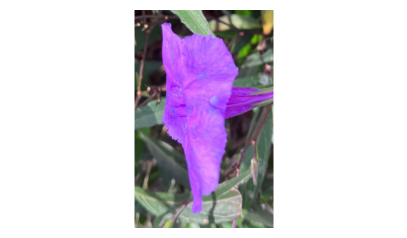

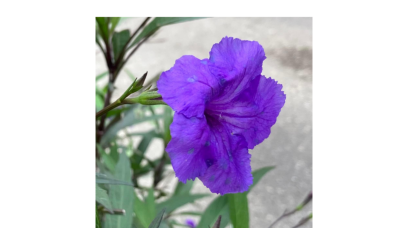

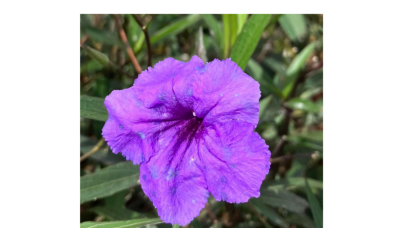

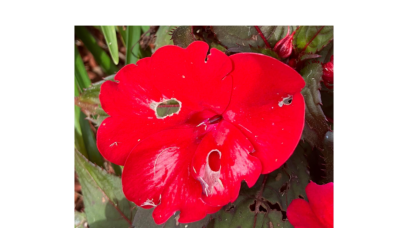

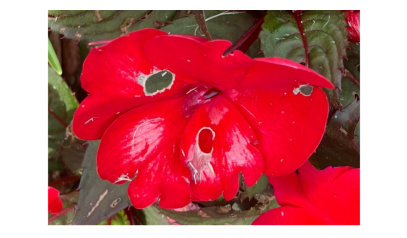

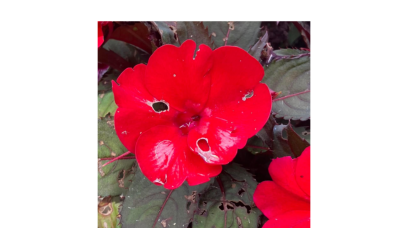

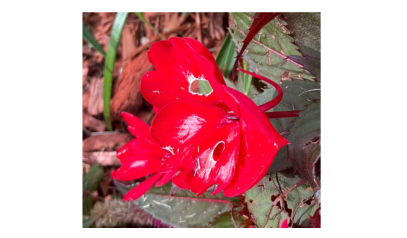

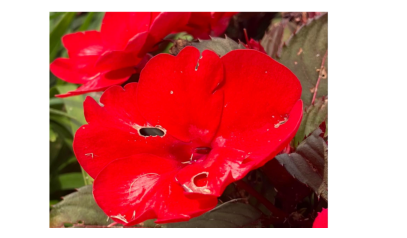

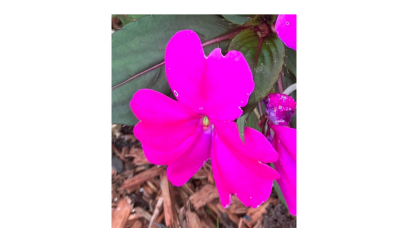

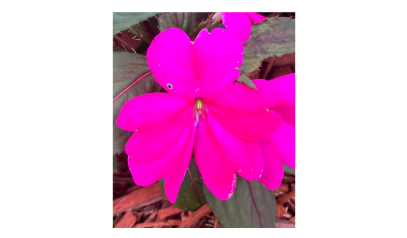

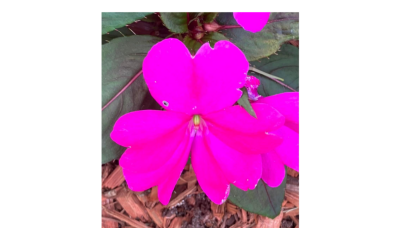

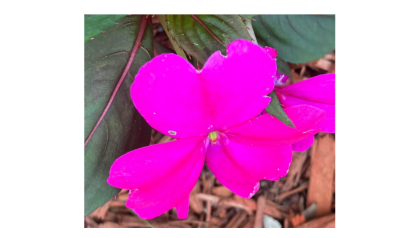

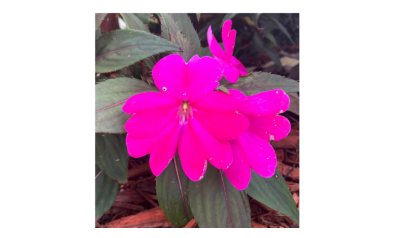

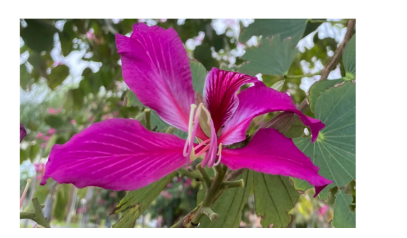

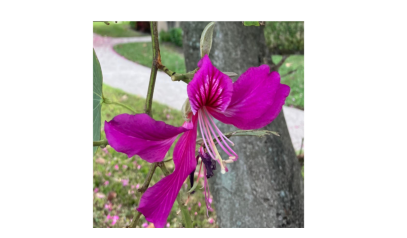

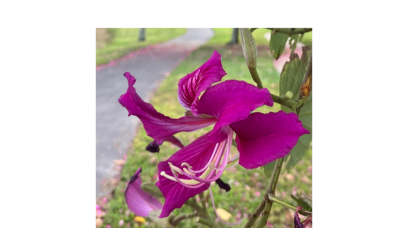

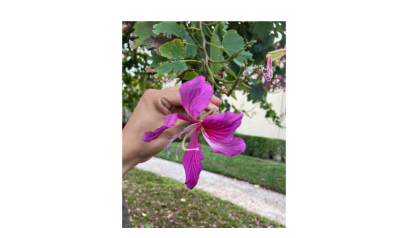

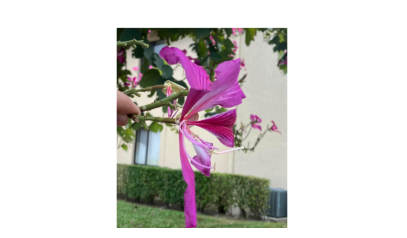

In [ ]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [ ]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [ ]:
images.shape

torch.Size([25, 3, 224, 224])

# Process Image

In [ ]:
y = model(images)

In [ ]:
y.shape

torch.Size([25, 1000])

In [ ]:
y_out = y.cpu().detach().numpy()

In [ ]:
224*224*3

150528

In [ ]:
1000/150528

0.00664328231292517

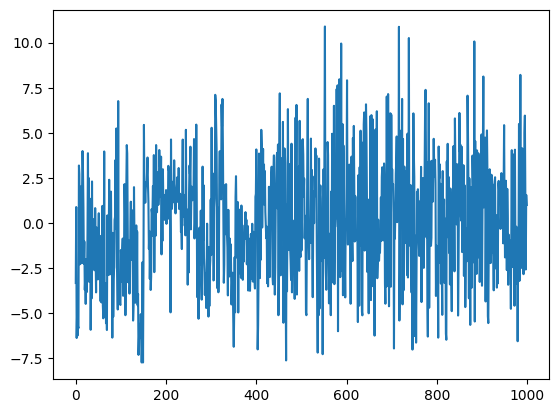

In [ ]:
plt.plot(y_out[0,:])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [ ]:
guesses.shape

(25,)

In [ ]:
guesses

array([552, 325, 552, 716, 716, 738, 738, 775, 883, 309, 496, 719, 496,
       496, 719, 723, 723, 723, 723, 552, 985, 723, 723, 723, 723])

In [ ]:
for i in list(guesses):
    print(labels[i])

feather boa, boa
sulphur butterfly, sulfur butterfly
feather boa, boa
picket fence, paling
picket fence, paling
pot, flowerpot
pot, flowerpot
sarong
vase
bee
Christmas stocking
piggy bank, penny bank
Christmas stocking
Christmas stocking
piggy bank, penny bank
pinwheel
pinwheel
pinwheel
pinwheel
feather boa, boa
daisy
pinwheel
pinwheel
pinwheel
pinwheel


# Retrain

In [ ]:
Y = np.zeros(50,)
Y[25:] = 1

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = y.detach().cpu().numpy() 

In [ ]:
X.shape

(25, 1000)

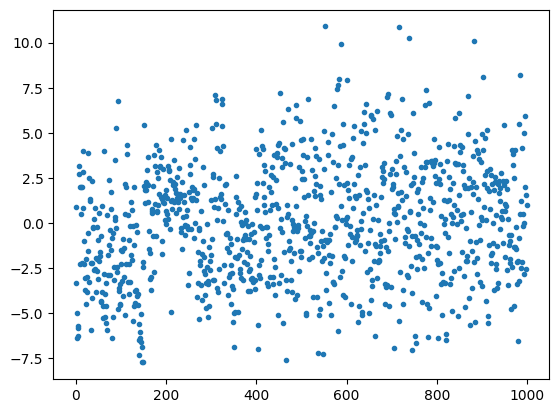

In [ ]:
plt.plot(X[0],'.')

In [ ]:
X[0]

array([-3.32355213e+00,  8.87085199e-01, -6.37283134e+00, -4.96792984e+00,
       -6.23782015e+00, -5.73459530e+00, -5.83033800e+00,  3.18942547e+00,
        2.70112038e+00, -2.28837800e+00,  2.00415802e+00,  2.02326798e+00,
        4.76850033e-01, -2.23099113e+00,  1.98698211e+00,  3.99159288e+00,
        2.83189392e+00,  8.55996192e-01, -2.25595164e+00, -1.02141058e+00,
       -3.70429635e+00, -3.02396679e+00, -4.48258162e+00, -1.99744165e+00,
       -3.83404541e+00, -2.97241974e+00, -5.75835407e-01,  3.87220359e+00,
       -1.53624821e+00,  2.48815989e+00, -3.26802063e+00,  1.20168793e+00,
        1.34389734e+00, -5.91866255e+00, -2.22999454e+00, -4.18308544e+00,
        2.30559111e+00, -2.20781040e+00, -2.87351519e-01, -2.03175828e-01,
        2.12654784e-01, -2.61825371e+00, -2.57437873e+00,  8.27386320e-01,
       -1.95156968e+00, -3.84535813e+00, -2.46845573e-01, -1.97548795e+00,
       -2.64914346e+00, -3.12414646e+00, -9.27078724e-01,  5.42968690e-01,
       -2.07909298e+00, -

In [ ]:
np.argmax(X[0])

552

In [ ]:
index_winner = np.argmax(X[0])

labels[index_winner]

'feather boa, boa'

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [ ]:
for i in top_ten:
    print(labels[i])

feather boa, boa
picket fence, paling
pot, flowerpot
vase
hamper
daisy
wig
hair slide
hoopskirt, crinoline
greenhouse, nursery, glasshouse


In [ ]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 29.,  78., 166., 199., 209., 179.,  88.,  39.,   8.,   5.]),
 array([-7.73021221, -5.86745596, -4.00470018, -2.14194393, -0.27918798,
         1.5835681 ,  3.44632411,  5.30908012,  7.17183638,  9.03459263,
        10.8973484 ]),
 <BarContainer object of 10 artists>)

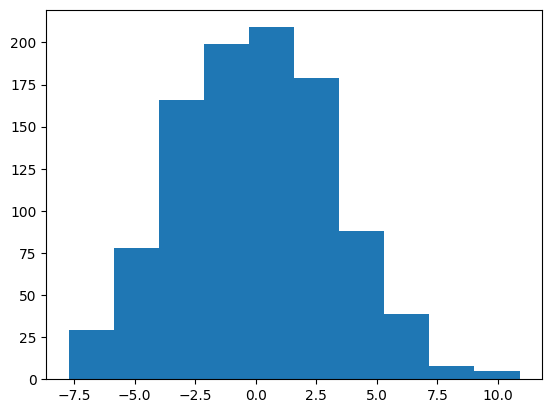

In [ ]:
plt.hist(X[0])

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)

In [ ]:
X.shape

torch.Size([25, 1000])

In [ ]:
!nvidia-smi

Thu May  4 02:29:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    30W /  70W |   1521MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([25, 1000])

In [ ]:
Y.shape

torch.Size([50])

In [ ]:
a = np.array([[1, 2], [3, 4]])

In [ ]:
b = np.array([[5, 6], [1, 0]])

In [ ]:
a.shape,b.shape

((2, 2), (2, 2))

In [ ]:
a@b

array([[ 7,  6],
       [19, 18]])

In [ ]:
def inner_prod(a,b):
    c = 0 
    for i in range(a.shape[0]):
        c += a[i]*b[i]
    return c

In [ ]:
def mat_mult(a,b):

    if a.shape[1] == b.shape[0]:

        c = np.zeros((a.shape[0],b.shape[1]))

        for i in range(a.shape[0]):
            for j in range(b.shape[1]):
               c[i,j] = inner_prod(a[i,:],b[:,j])
        return c
        
    else:
        print("error") 



In [ ]:
%%timeit
a@b

1.46 µs ± 414 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
%%timeit
mat_mult(a,b)

12.1 µs ± 6.72 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
x = np.random.random((1000,1))

In [ ]:
w = np.random.random((2,1000))

In [ ]:
w.shape,x.shape

((2, 1000), (1000, 1))

In [ ]:
z = mat_mult(w,x)

In [ ]:
z.shape

(2, 1)

In [ ]:
z

array([[249.67283955],
       [241.47031651]])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


ValueError: ignored

https://tensorspace.org/